In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

Need to remove the unusable and redundant columns

In [737]:
df = pd.read_csv('all_seasons.csv', index_col=0)
df.reset_index(inplace=True, drop = True)

In [738]:
cols_todel = ['ga','match report_x','match report_y','date_opp','time_opp','comp_opp','round_opp','day_opp','venue_opp','result_opp','ga_opp','opponent_opp','xg', 'xg_y', 'match report_opp','poss_y', 'comp', 'captain','referee','notes', 'attendance','formation']
df.drop(cols_todel, axis=1, inplace=True)
df.shape

(4025, 214)

gf = gols for
ga = goals against
gf_opp = goals or the opponent
ga_opp = goals against the opponent. 

poss = possession, it has got x, y in the merging, will drop one and use the other. 

Will remove ga and ga_opp as the columns are redundant. 

Some gf and gf_opp parts have "()" in them for aggregate score. I will have to ensure they are processed correctly, I will take the value outside of the parenthesis, as that is the match sore.

In [739]:
df.loc[df["gf"].str.contains(" "),'gf'] = df["gf"].str[0] # if the Score column starts with "(", then grab the first from left char.
df.loc[df["gf_opp"].str.contains(" "),'gf_opp'] = df["gf_opp"].str[0]

df.head(5)

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,fls_opp,pkwon_opp,pkcon_opp,og_opp,recov_opp,won_opp,won%_opp,xga,team,season
0,14/09/2020,20:15,Matchweek 1,Mon,Away,W,3,Brighton,3.0,9.0,...,8.0,0.0,1.0,0.0,54.0,10.0,43.5,1.1,Chelsea,2020-2021
1,20/09/2020,16:30,Matchweek 2,Sun,Home,L,0,Liverpool,0.0,4.0,...,6.0,0.0,1.0,0.0,53.0,3.0,21.4,2.1,Chelsea,2020-2021
2,23/09/2020,19:45,Third round,Wed,Home,W,6,Barnsley,6.0,17.0,...,8.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Chelsea,2020-2021
3,26/09/2020,17:30,Matchweek 3,Sat,Away,D,3,West Brom,3.0,22.0,...,8.0,0.0,0.0,0.0,48.0,11.0,39.3,0.6,Chelsea,2020-2021
4,29/09/2020,19:45,Fourth round,Tue,Away,D,1,Tottenham,1.0,7.0,...,11.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Chelsea,2020-2021


## Encoding string columns

- First clean the opponent column before encoding it, the namings are not consistent


In [740]:
len(df['opponent'].unique())

521

In [741]:
df['opponent'] = df['opponent'].apply(lambda x: x[3:].lstrip() if x[0].islower() else x)  # If the format of the name starts with small letters, that is the country code. 

In [742]:
len(df['opponent'].unique())

457

In [743]:
df['opponent'] = df['opponent'].apply(lambda x:'Atletico Madrid' if x == 'Atlético Madrid' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Bayer Leverkusen' if x == 'Leverkusen' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Eintracht Frankfurt' if x == 'Eint Frankfurt' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Internazionale' if x == 'Inter' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Paris Saint Germain' if x == 'Paris S-G' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Red Bull Salzburg' if x == 'RB Salzburg' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Shakhtar Donetsk' if x == 'Shakhtar' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Tottenham Hotspur' if x == 'Tottenham' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Viktoria Plzen' if x == 'Viktoria Plzeň' else x)



In [744]:
df[df['opponent'].str.contains('Viktoria')]

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,fls_opp,pkwon_opp,pkcon_opp,og_opp,recov_opp,won_opp,won%_opp,xga,team,season
3030,31/08/2022,20:46,Round of 64,Wed,Away,W,5,Viktoria Köln,5.0,28.0,...,8.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Bayern Munich,2022-2023
3037,4/10/2022,18:45,Group stage,Tue,Home,W,5,Viktoria Plzen,5.0,21.0,...,9.0,0.0,0.0,0.0,46.0,12.0,44.4,0.5,Bayern Munich,2022-2023
3039,12/10/2022,21:00,Group stage,Wed,Away,W,4,Viktoria Plzen,4.0,15.0,...,9.0,0.0,0.0,0.0,54.0,19.0,50.0,1.2,Bayern Munich,2022-2023
3365,13/09/2022,18:45,Group stage,Tue,Away,W,2,Viktoria Plzen,2.0,19.0,...,10.0,0.0,0.0,0.0,41.0,10.0,40.0,0.3,Internazionale,2022-2023
3373,26/10/2022,18:45,Group stage,Wed,Home,W,4,Viktoria Plzen,4.0,22.0,...,8.0,0.0,0.0,0.0,42.0,19.0,63.3,0.1,Internazionale,2022-2023
3553,7/09/2022,21:00,Group stage,Wed,Home,W,5,Viktoria Plzen,5.0,20.0,...,8.0,0.0,0.0,0.0,47.0,9.0,47.4,0.8,Barcelona,2022-2023
3566,1/11/2022,21:00,Group stage,Tue,Away,W,4,Viktoria Plzen,4.0,11.0,...,15.0,1.0,0.0,0.0,50.0,14.0,70.0,2.6,Barcelona,2022-2023


Now encode the rest of the information rich categorical columns.

In [745]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df["venue_code"] = df["venue"].astype("category").cat.codes
df["opp_code"] = df["opponent"].astype("category").cat.codes #
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")
df["day_code"] = df["date"].dt.dayofweek
df.head()

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,recov_opp,won_opp,won%_opp,xga,team,season,venue_code,opp_code,hour,day_code
0,2020-09-14,20:15,Matchweek 1,Mon,Away,W,3,Brighton,3.0,9.0,...,54.0,10.0,43.5,1.1,Chelsea,2020-2021,0,72,20,0
1,2020-09-20,16:30,Matchweek 2,Sun,Home,L,0,Liverpool,0.0,4.0,...,53.0,3.0,21.4,2.1,Chelsea,2020-2021,1,227,16,6
2,2020-09-23,19:45,Third round,Wed,Home,W,6,Barnsley,6.0,17.0,...,NaN,NaN,NaN,NaN,Chelsea,2020-2021,1,49,19,2
3,2020-09-26,17:30,Matchweek 3,Sat,Away,D,3,West Brom,3.0,22.0,...,48.0,11.0,39.3,0.6,Chelsea,2020-2021,0,433,17,5
4,2020-09-29,19:45,Fourth round,Tue,Away,D,1,Tottenham Hotspur,1.0,7.0,...,NaN,NaN,NaN,NaN,Chelsea,2020-2021,0,393,19,1


## Missing Data
Deleting rows that are missing a lot of stats. Already have very high dimensionality, and not enough data or this many dimensions, so wil remove some of the stat columns. Let us have a visual on the missing values in all the columns. 

(4025, 218)

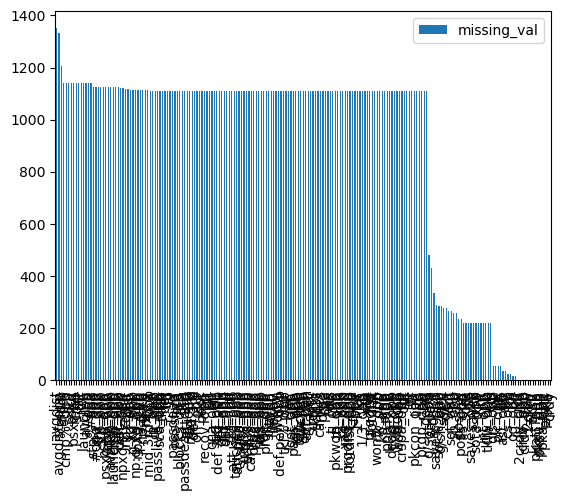

In [746]:
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
missing.rename(columns={0:'missing_val'}, inplace=True)
missing[missing['missing_val']>0].plot.bar()

df.shape

We can see that the number of missing values drops down in a step function. So we delete the columns that have over 300 missing values and the rows for anything less than that. This is the sweet spot as deleting more columns or rows will impact the quality of our data. 
Also, the relationship between various features in football matches is highly (e.g the opponent team) so imputation is not the answer here as it may affect the quality of the data too much.

In [747]:
cols_todel2 = missing[missing['missing_val']>300].index
df.drop(list(cols_todel2), axis=1, inplace=True)
df.shape

(4025, 64)

Of course if one is interested, one can use these columns with the rows that have them, but I choose to have lower dimensionality and more data rows. 

In [748]:
df = df.dropna(axis = 0) #drop rows with missing values
# df = df.reset_index(drop=True)
df.shape # and no missing values.

(3649, 64)

Everything that has to be numeric is already numeric. Let us make a target variable first.

## Setting up the target column

In [749]:
df['result'].value_counts()

W    2090
L     818
D     741
Name: result, dtype: int64

As can be seen from above, the result column is not balanced. Also, according to our brief of predicting if the game is going ot be a win or "not", we will have a binary target column, the result is either a win or loss. Te reason the number of wins is a lot higher than the losses and draws is that these tea have qualified for the Champions League. The qualifying teams win the majority of their games in the domestic leagues as well. 

In [750]:
df = df.sort_values("date")
#df['season'] = df['season'].str[0:4].astype('int')
#del df['index']
df=df.reset_index(drop=True)

In [751]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0])

venue
Away       0.525999
Home       0.621802
Neutral    0.458333
dtype: float64

In [752]:
df.venue.value_counts() # this is not balanced. Have to drop the venues that are neutral. It is only 24 rows. 

Away       1827
Home       1798
Neutral      24
Name: venue, dtype: int64

In [753]:
df = df.loc[df['venue']!='Neutral'] # dropping venue = neutral. 

In [754]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0]) # So in %62 of the cases, the team wins their home games, as opposed to onl 52% of their away games. 
# This is our benchmark.

venue
Away    0.525999
Home    0.621802
dtype: float64

In [755]:
df['target'] = (df['result'] == "W").astype("int")

# Prediction Using Machine Learning

In [756]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [757]:
predictors = ["venue_code", "opp_code", "hour", "day_code"] # initial predictors. 

In [758]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=1, class_weight='balanced')

train = df[df['date']< "2022-04-16"] # Using 70% of the rows for training and 30% for testing. cannot do splits since we cannot use future data to predict past games. 
test = df[df['date']> "2022-04-16"]

rf.fit(train[predictors],train['target'])

predictions = rf.predict(test[predictors])

print(train.shape)
print(test.shape)

accuracy_score(test["target"],predictions)

print('accuracy_score =' ,accuracy_score(test["target"],predictions))

(2503, 65)
(1111, 65)
accuracy_score = 0.5391539153915391


In [759]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=predictions))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,243,222
1,290,356


Accuracy score here is not a good measure, we use precision score as we have false positives and false negatives. 0 is a loss and 1 is a win. 

In [760]:
from sklearn.metrics import precision_score

precision_score(test["target"], predictions, average = None) # this shows that we predict %46 for away games and %62 for home games. We need to improve on this.

array([0.45590994, 0.61591696])

In [761]:
precision_score(test["target"], predictions, average = 'weighted')

0.5489473238240941

#### Feature engineering
We need to use the rest of the statistics we have to see if we can improve our model. Hence we introduce rolling averages of statistics from previous games as prediction metrics. We have to be careful not to feed any information to the model for predicting a game when we won't have the information. Yu cannot have goals for in the predictors, as that information is known after the game! 

In [762]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3,closed="left").mean() # closed = left -> to avoid data leakage from future matches
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group

In [763]:
def make_predictions(data, predictors):
    rf = RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=1)

    train = data[data['date']< "2022-03-16"] # Data in order of date use 70% for training
    test = data[data['date']> "2022-03-16"]

    rf.fit(train[predictors],train['target'])

    predictions = rf.predict(test[predictors])

    combined = pd.DataFrame(dict(actual=test["target"], predicted=predictions))

    precision_weight = precision_score(test["target"], predictions, average = 'weighted')
    precision_raw = precision_score(test["target"], predictions, average = None)

    return combined, precision_weight, precision_raw, rf.feature_importances_, rf

### Trying some features based on domain knowledge.

In [764]:
cols = ['gls','gls_opp','gf','gf_opp','sh', 'sot','g/sh','save%_opp','tkl+int','poss_x'] # Choosing based on domain knowledge.
new_cols = [f"{c}_rolling" for c in cols] # add_rolling to column names

df_rolling = df.groupby('team').apply(lambda x: rolling_averages(x,cols,new_cols))
df_rolling = df_rolling.droplevel('team')

combined, precision_weight, precision_raw, importances, rf = make_predictions (df_rolling, predictors+new_cols)

print("The raw precision [Away, Home] is:",precision_raw)
print("The weighted precision is:", precision_weight)

The raw precision [Away, Home] is: [0.53372434 0.62281723]
The weighted precision is: 0.5852497277404334


In [765]:
df_rolling.shape

(3472, 75)

In [766]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0]) # What we get by predicting home wins, i.e. %62 of the home games are won and %52 of the away games. 

venue
Away    0.525999
Home    0.621802
dtype: float64

We are already over the benchmark with the above stats, but we will try and improve. 

In [767]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,182,324
1,159,535


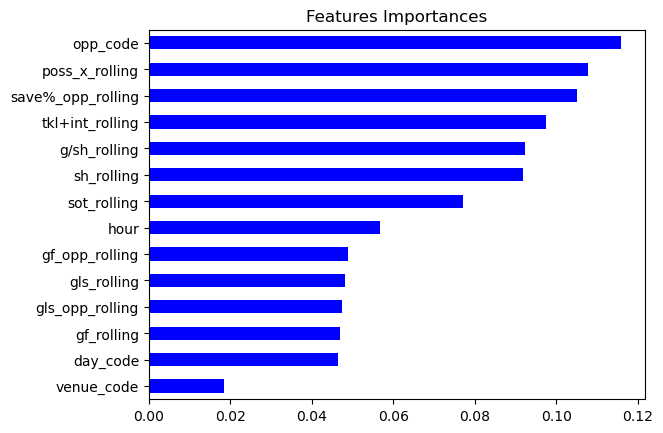

In [768]:
importance = pd.Series(data=importances,
                        index=  predictors+new_cols)
# Sort importances
importances_sorted = importance.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

### Using all the columns by getting a rolling average for them. 

In [769]:
predictors

['venue_code', 'opp_code', 'hour', 'day_code']

In [770]:
cols = ['gf',
       'gls', 'sh', 'sot', 'sot%', 'g/sh', 'pk', 'pkatt', 'gf_opp', 'gls_opp',
       'sh_opp', 'sot_opp', 'sot%_opp', 'g/sh_opp', 'pk_opp', 'pkatt_opp',
       'sota', 'saves', 'cs', 'pka', 'pksv', 'pkm', 'sota_opp', 'saves_opp',
       'save%_opp', 'cs_opp', 'pka_opp', 'pksv_opp', 'pkm_opp', 'ast',
       'ast_opp', 'crs', 'crs_opp', 'tklw', 'int', 'tkl+int', 'tklw_opp',
       'int_opp', 'tkl+int_opp', 'poss_x', 'poss_opp', 'crdy', 'crdr', '2crdy',
       'fls', 'og', 'crdy_opp', 'crdr_opp', '2crdy_opp', 'fls_opp', 'og_opp',
       ]

rolling_cols = [f"{c}_rolling" for c in cols] # add_rolling to column names

df_rolling = df.groupby('team').apply(lambda x: rolling_averages(x,cols,rolling_cols))
df_rolling = df_rolling.droplevel('team')

all_cols = rolling_cols+predictors

combined, precision_weight, precision_raw, importances, rf = make_predictions (df_rolling, all_cols)

print(precision_raw)
print(precision_weight)

[0.5       0.6006424]
0.5582048536759457


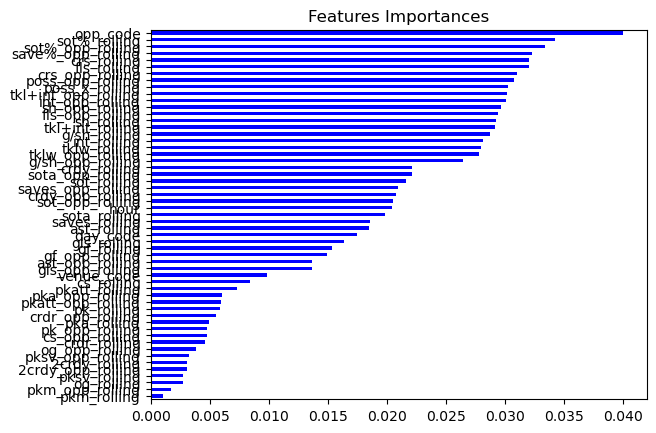

In [771]:
importance = pd.Series(data=importances,
                        index=  all_cols)
# Sort importances
importances_sorted = importance.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

### We rank the features based on their importance, and then we discard the east important ones. 

In [772]:
data ={'imp_vals':importances}
imp_df = pd.DataFrame(data=data, index=all_cols)
imp_df.sort_values(by = 'imp_vals')

,imp_vals
pkm_rolling,0.001043
pkm_opp_rolling,0.001715
og_rolling,0.002715
pksv_rolling,0.002732
2crdy_opp_rolling,0.003093
2crdy_rolling,0.003121
pksv_opp_rolling,0.003289
og_opp_rolling,0.003833
crdr_rolling,0.004605
cs_opp_rolling,0.004765


In [773]:
predictors3 = imp_df.loc[imp_df['imp_vals']>0.002].index # Selecting from the chosen features, and removing the east important ones. 
combined, precision_weight, precision_raw, importances,rf = make_predictions (df_rolling, predictors3)

print(precision_raw)
print(precision_weight)

pd.crosstab(index=combined["actual"], columns=combined["predicted"])

[0.51119403 0.60407725]
0.564911494031986


predicted,0,1
actual,,
0,137,369
1,131,563


Hence we have beaten the benchmark using selected features. Using the sequential feature selection to see if we can improve the score did not yield any results that could beat the above. 

## More feature Engineering with summation. 

In [774]:
df_rolling["fls_rolling+sot%_rolling"] = df_rolling["fls_rolling"]+df_rolling['sot%_rolling']

predictors3 = list(predictors3) + ["fls_rolling+sot%_rolling"] 



In [775]:
combined, precision_weight, precision_raw, importances,rf = make_predictions (df_rolling, predictors3)

print(precision_raw)
print(precision_weight)

pd.crosstab(index=combined["actual"], columns=combined["predicted"])

[0.54117647 0.61058201]
0.5813160078846353


predicted,0,1
actual,,
0,138,368
1,117,577


Marginal improvement

In [776]:
import pickle

#### Useful stuff
Do the following to get a list of the numeric columns, or select an type of column based on its tpes. 

```[key for key in dict(DF.dtypes) if dict(DF.dtypes)[key] in ['float64', 'int64']]```

predictors2 = [b for a, b in zip(sfs.get_support(), all_cols) if a] # extracting the features sfs has chosen for us. all_cols is a string list of all the columns, this uses the sfs.get_support mask.

In [777]:
selected_columns = ['team','venue','opponent','venue_code','opp_code','hour','day_code',
 'gf_rolling','gls_rolling','sh_rolling','sot_rolling','sot%_rolling','g/sh_rolling',
 'pk_rolling','pkatt_rolling','gf_opp_rolling','gls_opp_rolling','sh_opp_rolling','sot_opp_rolling',
 'sot%_opp_rolling','g/sh_opp_rolling','pk_opp_rolling','pkatt_opp_rolling','sota_rolling',
 'saves_rolling','cs_rolling','pka_rolling','pksv_rolling','pkm_rolling','sota_opp_rolling',
 'saves_opp_rolling','save%_opp_rolling','cs_opp_rolling','pka_opp_rolling','pksv_opp_rolling',
 'pkm_opp_rolling','ast_rolling','ast_opp_rolling','crs_rolling','crs_opp_rolling','tklw_rolling',
 'int_rolling','tkl+int_rolling','tklw_opp_rolling','int_opp_rolling','tkl+int_opp_rolling',
 'poss_x_rolling','poss_opp_rolling','crdy_rolling','crdr_rolling','2crdy_rolling', 'fls_rolling',
 'og_rolling','crdy_opp_rolling','crdr_opp_rolling','2crdy_opp_rolling','fls_opp_rolling',
 'og_opp_rolling','fls_rolling+sot%_rolling']

In [778]:
len(df[df['season']=='2022-2023']['team'].unique())

32

In [779]:
df_rolling [df_rolling['season']=='2022-2023']['team'].unique()

array(['Ajax', 'Atletico Madrid', 'Barcelona', 'Bayer Leverkusen',
       'Bayern Munich', 'Benfica', 'Celtic', 'Chelsea', 'Club Brugge',
       'Dinamo Zagreb', 'Dortmund', 'Eintracht Frankfurt',
       'FC Copenhagen', 'Internazionale', 'Juventus', 'Liverpool',
       'Maccabi Haifa', 'Manchester City', 'Marseille', 'Milan', 'Napoli',
       'Paris Saint Germain', 'Porto', 'RB Leipzig', 'Rangers',
       'Real Madrid', 'Red Bull Salzburg', 'Sevilla', 'Shakhtar Donetsk',
       'Sporting CP', 'Tottenham Hotspur', 'Viktoria Plzen'], dtype=object)

# Creating the dataframe used for display purposes 

In [780]:
dfd = pd.read_csv('all_seasons.csv',index_col=0)
dfd.reset_index(inplace=True, drop = True)
dfd['comp'].unique()

array(['Premier League', 'EFL Cup', 'Champions Lg', 'FA Cup', 'La Liga',
       'Supercopa de España', 'Copa del Rey', 'Ligue 1',
       'Trophée des Champions', 'Coupe de France', 'Bundesliga',
       'Super Cup', 'DFL-Supercup', 'DFB-Pokal', 'Community Shield',
       'Primeira Liga', 'Serie A', 'Coppa Italia', 'Supercoppa Italiana',
       'Europa Lg', 'First Division A', 'Eredivisie', 'Super League',
       'Süper Lig', 'Superliga', 'NB I', 'Swiss Super League',
       'Allsvenskan', '1. HNL', 'Premiership', 'First League'],
      dtype=object)

In [781]:
dfd = dfd[dfd['comp']=='Champions Lg']
dfd.shape

(786, 236)

In [782]:
dfd.drop(cols_todel, axis=1, inplace=True)
dfd.loc[dfd["gf"].str.contains(" "),'gf'] = dfd["gf"].str[0] # if the Score column starts with "(", then grab the first from left char.
dfd.loc[dfd["gf_opp"].str.contains(" "),'gf_opp'] = dfd["gf_opp"].str[0]
dfd['opponent'] = dfd['opponent'].apply(lambda x: x[3:].lstrip() if x[0].islower() else x)  # If the format of the name starts with small letters, that is the country code. 
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Atletico Madrid' if x == 'Atlético Madrid' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Bayer Leverkusen' if x == 'Leverkusen' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Eintracht Frankfurt' if x == 'Eint Frankfurt' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Internazionale' if x == 'Inter' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Paris Saint Germain' if x == 'Paris S-G' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Red Bull Salzburg' if x == 'RB Salzburg' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Shakhtar Donetsk' if x == 'Shakhtar' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Tottenham Hotspur' if x == 'Tottenham' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Viktoria Plzen' if x == 'Viktoria Plzeň' else x)



dfd['date'] = pd.to_datetime(dfd['date'],dayfirst=True)
dfd["venue_code"] = dfd["venue"].astype("category").cat.codes
dfd["opp_code"] = dfd["opponent"].astype("category").cat.codes #
dfd["hour"] = dfd["time"].str.replace(":.+", "", regex=True).astype("int")
dfd["day_code"] = dfd["date"].dt.dayofweek


In [783]:
dfd.shape

(786, 218)

In [784]:
list(dfd.isnull().sum()) # Many rows still have null values. Delete them. 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 34,
 40,
 42,
 42,
 68,
 85,
 78,
 20,
 0,
 84,
 84,
 85,
 84,
 84,
 0,
 20,
 34,
 40,
 46,
 46,
 75,
 85,
 78,
 20,
 0,
 84,
 84,
 85,
 84,
 84,
 26,
 26,
 61,
 0,
 89,
 89,
 0,
 0,
 0,
 89,
 89,
 103,
 89,
 89,
 89,
 89,
 89,
 90,
 89,
 140,
 26,
 26,
 58,
 0,
 89,
 89,
 0,
 0,
 0,
 89,
 89,
 103,
 89,
 89,
 89,
 89,
 89,
 90,
 89,
 141,
 78,
 78,
 0,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 0,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 26,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 26,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 26,
 78,
 78,
 78,
 78,
 78,
 78,
 26,
 0,
 78,
 78,
 78,
 26,
 78,
 78,
 78,
 78,
 78,
 78,
 26,
 0,
 78,
 78,
 38,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 38,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 0,
 0,
 0,
 26,
 78,
 78,
 0,
 78,
 78,
 78,
 0,
 0,
 0,
 26,
 

In [785]:
list(dfd[dfd['team']=='Maccabi Haifa'].isnull())

['date',
 'time',
 'round',
 'day',
 'venue',
 'result',
 'gf',
 'opponent',
 'gls',
 'sh',
 'sot',
 'sot%',
 'g/sh',
 'g/sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'xg_x',
 'npxg',
 'npxg/sh',
 'g-xg',
 'np:g-xg',
 'gf_opp',
 'gls_opp',
 'sh_opp',
 'sot_opp',
 'sot%_opp',
 'g/sh_opp',
 'g/sot_opp',
 'dist_opp',
 'fk_opp',
 'pk_opp',
 'pkatt_opp',
 'xg_opp',
 'npxg_opp',
 'npxg/sh_opp',
 'g-xg_opp',
 'np:g-xg_opp',
 'sota',
 'saves',
 'save%',
 'cs',
 'psxg',
 'psxg+/-',
 'pka',
 'pksv',
 'pkm',
 'cmp',
 'att',
 'cmp%',
 'thr',
 'launch%',
 'avglen',
 'opp',
 'stp',
 'stp%',
 '#opa',
 'avgdist',
 'sota_opp',
 'saves_opp',
 'save%_opp',
 'cs_opp',
 'psxg_opp',
 'psxg+/-_opp',
 'pka_opp',
 'pksv_opp',
 'pkm_opp',
 'cmp_opp',
 'att_opp',
 'cmp%_opp',
 'thr_opp',
 'launch%_opp',
 'avglen_opp',
 'opp_opp',
 'stp_opp',
 'stp%_opp',
 '#opa_opp',
 'avgdist_opp',
 'totdist',
 'prgdist',
 'ast',
 'xag',
 'xa',
 'kp',
 '1-Mar',
 'ppa',
 'crspa',
 'prgp',
 'totdist_opp',
 'prgdist_opp',
 'ast_opp',
 

In [786]:
dfd = dfd.dropna(axis = 0)
dfd.shape

(512, 218)

In [787]:
dfd[dfd['team']=='Maccabi Haifa']

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,recov_opp,won_opp,won%_opp,xga,team,season,venue_code,opp_code,hour,day_code
3919,2022-09-06,20:00,Group stage,Tue,Away,L,0,Benfica,0.0,7.0,...,61.0,9.0,45.0,1.1,Maccabi Haifa,2022-2023,0,11,20,1
3920,2022-09-14,22:00,Group stage,Wed,Home,L,1,Paris Saint Germain,1.0,13.0,...,42.0,4.0,30.8,1.8,Maccabi Haifa,2022-2023,1,52,22,2
3921,2022-10-05,21:00,Group stage,Wed,Away,L,1,Juventus,1.0,20.0,...,53.0,5.0,35.7,2.3,Maccabi Haifa,2022-2023,0,30,21,2
3922,2022-10-11,19:45,Group stage,Tue,Home,W,2,Juventus,2.0,14.0,...,65.0,12.0,40.0,0.5,Maccabi Haifa,2022-2023,1,30,19,1
3923,2022-10-25,21:00,Group stage,Tue,Away,L,2,Paris Saint Germain,2.0,13.0,...,48.0,4.0,33.3,2.6,Maccabi Haifa,2022-2023,0,52,21,1


In [788]:
len(dfd['team'].unique())

51

In [789]:
dfd.sort_values(by='date').reset_index(inplace=True)

In [790]:
num_cols = dfd.select_dtypes('number').columns
#num_cols = num_cols[0:11]

In [791]:
num_cols.has_duplicates

False

In [792]:
new_cols = [f"{c}_rolling" for c in list(num_cols)] # add_rolling to column names
new_cols

['gls_rolling',
 'sh_rolling',
 'sot_rolling',
 'sot%_rolling',
 'g/sh_rolling',
 'g/sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'xg_x_rolling',
 'npxg_rolling',
 'npxg/sh_rolling',
 'g-xg_rolling',
 'np:g-xg_rolling',
 'gls_opp_rolling',
 'sh_opp_rolling',
 'sot_opp_rolling',
 'sot%_opp_rolling',
 'g/sh_opp_rolling',
 'g/sot_opp_rolling',
 'dist_opp_rolling',
 'fk_opp_rolling',
 'pk_opp_rolling',
 'pkatt_opp_rolling',
 'xg_opp_rolling',
 'npxg_opp_rolling',
 'npxg/sh_opp_rolling',
 'g-xg_opp_rolling',
 'np:g-xg_opp_rolling',
 'sota_rolling',
 'saves_rolling',
 'save%_rolling',
 'cs_rolling',
 'psxg_rolling',
 'psxg+/-_rolling',
 'pka_rolling',
 'pksv_rolling',
 'pkm_rolling',
 'cmp_rolling',
 'att_rolling',
 'cmp%_rolling',
 'thr_rolling',
 'launch%_rolling',
 'avglen_rolling',
 'opp_rolling',
 'stp_rolling',
 'stp%_rolling',
 '#opa_rolling',
 'avgdist_rolling',
 'sota_opp_rolling',
 'saves_opp_rolling',
 'save%_opp_rolling',
 'cs_opp_rolling',
 'ps

In [793]:
dfd_rolling = dfd.groupby('team').apply(lambda x: rolling_averages(x,num_cols,new_cols))
dfd_rolling = dfd_rolling.droplevel('team')

C:\Users\Ramin\AppData\Local\Temp\ipykernel_19724\1506766940.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Ramin\AppData\Local\Temp\ipykernel_19724\1506766940.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Ramin\AppData\Local\Temp\ipykernel_19724\1506766940.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [794]:
len(dfd_rolling['team'].unique())

46

In [795]:
len(df_rolling[df_rolling['season']=='2022-2023']['team'].unique())

32

In [796]:
dfd_rolling[dfd_rolling['team']=='Maccabi Haifa']

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,pkcon_opp_rolling,og_opp_rolling,recov_opp_rolling,won_opp_rolling,won%_opp_rolling,xga_rolling,venue_code_rolling,opp_code_rolling,hour_rolling,day_code_rolling
3922,2022-10-11,19:45,Group stage,Tue,Home,W,2,Juventus,2.0,14.0,...,0.0,0.0,52.000000,6.0,37.166667,1.733333,0.333333,31.000000,21.000000,1.666667
3923,2022-10-25,21:00,Group stage,Tue,Away,L,2,Paris Saint Germain,2.0,13.0,...,0.0,0.0,53.333333,7.0,35.500000,1.533333,0.666667,37.333333,20.666667,1.666667


## Minmax normaliation for for the radar plots. 

In [797]:

dfd_rolling[new_cols] = (dfd_rolling[new_cols]-dfd_rolling[new_cols].min())/(dfd_rolling[new_cols].max()-dfd_rolling[new_cols].min())

In [798]:
dfd_rolling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 987 to 2639
Columns: 425 entries, date to day_code_rolling
dtypes: datetime64[ns](1), float64(408), int32(1), int64(3), int8(2), object(10)
memory usage: 1.2+ MB


In [799]:
dfd_rolling[dfd_rolling['team']=='Maccabi Haifa']

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,pkcon_opp_rolling,og_opp_rolling,recov_opp_rolling,won_opp_rolling,won%_opp_rolling,xga_rolling,venue_code_rolling,opp_code_rolling,hour_rolling,day_code_rolling
3922,2022-10-11,19:45,Group stage,Tue,Home,W,2,Juventus,2.0,14.0,...,0.0,0.0,0.455446,0.145161,0.285409,0.357724,0.333333,0.364078,0.909091,0.333333
3923,2022-10-25,21:00,Group stage,Tue,Away,L,2,Paris Saint Germain,2.0,13.0,...,0.0,0.0,0.495050,0.193548,0.249822,0.308943,0.666667,0.456311,0.818182,0.333333


In [800]:

appData = [predictors3, df_rolling, rf,importances, dfd_rolling]
pickle.dump(appData,open('appData.pkl','wb'))


In [801]:
dfd_rolling.columns

Index(['date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'opponent',
       'gls', 'sh',
       ...
       'pkcon_opp_rolling', 'og_opp_rolling', 'recov_opp_rolling',
       'won_opp_rolling', 'won%_opp_rolling', 'xga_rolling',
       'venue_code_rolling', 'opp_code_rolling', 'hour_rolling',
       'day_code_rolling'],
      dtype='object', length=425)

In [802]:
dfd_rolling['xg_x_rolling']

987     0.317308
1972    0.250000
1985    0.413462
2001    0.509615
3698    0.567308
          ...   
2627    0.192308
2630    0.317308
2633    0.317308
2636    0.326923
2639    0.269231
Name: xg_x_rolling, Length: 360, dtype: float64

In [803]:
shooting = ["gls_rolling", "sh_rolling","sot_rolling","dist_rolling",'xg_x_rolling']

In [804]:
dfd_rolling[shooting]

,gls_rolling,sh_rolling,sot_rolling,dist_rolling,xg_x_rolling
987,0.142857,0.339623,0.379310,0.471795,0.317308
1972,0.142857,0.339623,0.310345,0.497436,0.250000
1985,0.357143,0.358491,0.310345,0.258974,0.413462
2001,0.500000,0.490566,0.379310,0.289744,0.509615
3698,0.500000,0.566038,0.379310,0.138462,0.567308
...,...,...,...,...,...
2627,0.214286,0.377358,0.275862,0.600000,0.192308
2630,0.428571,0.698113,0.517241,0.512821,0.317308
2633,0.357143,0.679245,0.413793,0.405128,0.317308
2636,0.357143,0.584906,0.413793,0.366667,0.326923


In [805]:
len(dfd_rolling['team'].unique())

46

In [806]:
import plotly.graph_objects as go
import plotly.offline as pyo
selected_team = 'Ajax'
selected_opponent = 'Atletico Madrid'